#  6. Related Rates with Trig Functions and Football

In this lab, we will solve a related rates problem which involves the use of trig functions.  In particular, we will determine how fast a camera is rotating as it tracks a football player speeding along the sideline to the endzone.

The following code creates an animation, Football_Animation.gif. Execute the code and then open the .gif file to view the video.

In [1]:
!pip install svgpath2mpl
!pip install svgpathtools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook
%matplotlib inline
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

frames=9
for n in range(frames):

#green background
    verts = [(-20, -20),  # left, bottom
         (-20, 100),  # left, top
         (100, 100),  # right, top
         (100, -20),  # right, bottom
         (0., 0.),  # ignored
        ]
    codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY,]

    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='green', lw=.1, edgecolor='w')
    fig, ax = plt.subplots()
    ax.add_patch(patch)
    ax.set_xlim(-2, 10)
    ax.set_ylim(-2, 10)
    
#endzone
    plt.gca().add_patch(Rectangle((7.88,-20),50,20.04, edgecolor='w', facecolor=(.0,.1,.4), lw=4))

#side line
    plt.gca().add_patch(Rectangle((6.8,-20),70,200, edgecolor='w', facecolor='none', lw=70))

#Yard Marks
    yards= [0,1,2,3,4,5,6,7,8,9,10]
    for i in range(len(yards)):
        plt.gca().add_patch(Rectangle((8.1,i),.5,.1, edgecolor='w', facecolor='w', lw=1))
#5 & 10
    plt.gca().add_patch(Rectangle((8.1,5),50,.1, edgecolor='w', facecolor='w', lw=1))
    plt.gca().add_patch(Rectangle((8.1,10),50,.1, edgecolor='w', facecolor='w', lw=1))

#Adjacent line to camera
    plt.gca().add_patch(Rectangle((0.3,-0.1),7.68,.1, edgecolor='none', facecolor='yellow', lw=1))

#Tracking line
    x = np.linspace(0, 8, 100)
    f = lambda x : ((8-n)/8)*x
    y=f(x)
    plt.plot(x,((8-n)/8)*x,'--y')

#Bob Hayes
    import matplotlib as mpl
    from svgpath2mpl import parse_path
    from svgpathtools import svg2paths
    player_path, attributes = svg2paths('bullet_bob.svg')
    player_marker = parse_path(attributes[0]['d'])
    player_marker.vertices -= player_marker.vertices.mean(axis=0)
    x=7.8
    y=8.8-(n)
    plt.plot(x,y, marker=player_marker, markersize=35,color= 'b')
    
#Camera
    camera_path, attributes = svg2paths('camera.svg')
    camera_marker = parse_path(attributes[0]['d'])
    camera_marker.vertices -= camera_marker.vertices.mean(axis=0)
    camera_marker = camera_marker.transformed(mpl.transforms.Affine2D().rotate_deg(45-(5*n)))
    camera_marker = camera_marker.transformed(mpl.transforms.Affine2D().scale(.1,.1))
    x = -0.01
    y = 0.15
    plt.plot(x,y,marker=camera_marker,markersize=30,color = 'k')

#Annotations
    ax.annotate('Camera',
                xy=(0, 1), xycoords='data',
                xytext=(0, -35), textcoords='offset points', color='white')
#Legend
    plt.xlabel('Distance from camera (yds)')
    plt.ylabel('Distance from endzone (yds)')
    plt.title('"Bullet" Bob Hayes Returning a Kick')

#Save each frame as a .png
    plt.savefig(str(n)+'.png')
    plt.close()

#Save as a GIF
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('Football_Animation.gif',
               save_all=True,
               append_images=images[1:],
               duration=400,
               loop=0)

Now the idea of the scenario is how we can use calculus to solve the problem of how fast the camera must rotate to stay pointed at the player. To begin, we need to review some basic info about trig functions.

<h4> Defintion of Trig Functions</h4>
The acronym SOH-CAH-TOA is helpful to remember the definitions of the three basic trig functions sine, cosine, and tangent as ratios of sides of a right triangle:

<p style='text-align:center; font-family: Time New Roman; font-size:1.2em; color:black;'>
    $\sin(\theta)=\frac{opposite}{hypotenuse} $&emsp;&emsp;&emsp;&emsp;&emsp;  $\cos(\theta)=\frac{adjacent}{hypotenuse}$ &emsp;&emsp;&emsp;&emsp;&emsp;$  \tan(\theta)= \frac{opposite}{adjacent} $
    </p>

<h4> Derivatives of basic trig functions</h4>
The basic derivative formuas are 

$$\frac{d}{d\theta} \sin(\theta)=\cos(\theta)$$

$$\frac{d}{d\theta} \cos(\theta)=-\sin(\theta)$$ 

$$ \frac{d}{d\theta} \tan(\theta)=\sec^2(\theta)=\frac{1}{\cos^2(\theta)} $$

    
In our application problem, we will assume that the angle $\theta$ is changing with time $t$.  In this case, the derivatives with respect to time $t$ are given by
    <p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
     $\frac{d}{dt}\sin(\theta(t))=\cos(\theta)\frac{d\theta}{dt}$&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   $\frac{d}{dt}\cos(\theta(t))=-\sin(\theta)\frac{d\theta}{dt}$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  $\frac{d}{dt}\tan(\theta(t))=\sec^2(\theta)\frac{d\theta}{dt}=\frac{d\theta/dt}{\cos^2(\theta)} $

<h4>Example</h4> 

Find $\frac{d}{dt}$ of $\tan$($t^2$). (Hint: In this case, $\theta(t)=t^2$)

>**Answer**:    $\sec^2(t^2)2t$ or $\frac{2t}{\cos^2(t^2)}$ 

*Explanation:*
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
It's been given that the derivative $d/dt$ of $\tan$($\theta(t)$) is $\sec^2(\theta)\frac{d\theta}{dt}$ . Therefore, since $d\theta/dt$ is $2t$, multiplying by $\sec^2(\theta)\frac{d\theta}{dt}$ gives $\sec^2(t^2)2t$ or more simply,   $\frac{2t}{\cos^2(t^2)}$.

<h4>Radian Measure</h4> 

The above formulas for the derivatives of $\sin(\theta)$, $\cos(\theta))$ and $\tan(\theta)$ all assume that the angle $\theta$ is measured in radians.  

Conversion between radians and degrees is possible if we remember that $\pi$ radians = 180 degrees or $2\pi$ radians = 360 degrees.

<h4> Example:</h4> Convert $\frac{5}{6}$ radians to degrees

>**Answer**: $\frac{5}{6}$ $radians$ x $\frac{180 degrees}{\pi  radians}$ = $\frac{150}{\pi}$ degrees

_Explanation:_
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
It's been given that $\pi$ radians = 180 degrees so $\frac{180 degrees}{\pi  radians} = 1$. We can complete the conversion using cross cancelation method.



### Jupyter Notebook's internal class modules


In [9]:
from math import pi, sin, cos, tan, asin, acos, atan, radians, degrees

You can use the imported modules to do calculations within the notebook. For correct syntax, code as follows: 

In [10]:
sin(pi/4)

0.7071067811865475

To convert from radians to degrees, simply type degrees(radian value). This will give you the following value:

In [11]:
degrees(pi)

180.0

Furthermore, by default Python returns the input in radians, but you can shortcut the conversion to degrees as such:

In [12]:
degrees(atan(1)) #This asks for the degree conversion of the radian value of arctangent of a right triangle with congruent sides (8/8, 6/6, and so on)

45.0

<h4>Plotting a Triangle using vertex points

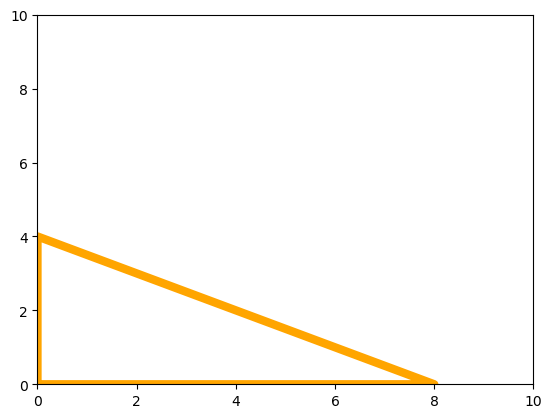

In [13]:
import matplotlib.pyplot as plt
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot([0, 0, 8, 0], [0, 4, 0, 0], linewidth=6, color='orange')

This Triangle is made up of 4 vertices. Its vertices' points are as follows: plt.plot([ x1, x2, x3, x4 ][ y1, y2, y3, y4 ]). Thus, you can control its vertices by manipultating the appropriate axes variables. However, make sure its first and last vertices are set on the origin, by giving x1, y1 & x4, y4 values of 0: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   [ 0, x2, x3, 0 ][ 0, y2, y3, 0 ]. 

(Hint: To keep the adjacent sides of a right triangle on the axes, make sure x2 and y3 = 0. )

<h3> Football Problem </h3>

 Bob Hayes won the 100 meter dash at the Tokyo '64 Olympics equalling the world record of 10.0 seconds.  Hayes went on to be a star wide receiver with the Dallas Cowboys.
 
 A TV camera is positioned on the goal line and 8 yards from the sideline. The camera stays fixed on Hayes, who is currently on the 8 yard line and sprinting towards the end zone at 10 yards per second.  
 
 Answer the questions below to determine how fast the camera is turning (in degrees per second).
 
 

1) From the Figure below , give an equation for $y$ in terms of $\theta$.

<img src="football.png" alt="Drawing" style="width: 250px;"/>

>**Answer**: $y(t) = 8 \tan(\theta(t)$)

_Explanation:_
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
We know that $tangent$ = $\frac{opposite}{adjacent}$. 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
In our case, the opposite side is $y$ and adjacent side is 8, so $\tan$($\theta$) =  $\frac{y}{8}$. 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
To convert to $y(t)$, we multiply on both sides and get $y(t)$ = $8$ $\tan$($\theta$)

2a)  What is the physical meaning of $\frac{dy}{dt}$ ?

>**Answer**: The physical meaning of $\frac{dy}{dt}$ is the speed of Bob Hayes as he is running towards the end line from the side line measured in yds/sec.

2b) What is the physical meaning of $\frac{d\theta}{dt}$ ?

>**Answer**: The physical meaning of $\frac{d\theta}{/dt}$ is how fast the camera angle is turning as it keeps pointing at Hayes as he runs towards the goal line.

3) If $\theta$ is measured in radians, then $\frac{d}{dt} \tan(\theta(t)) = \frac{1}{\cos^2\theta} \frac{d\theta}{dt}$.  Use your answer to problem 1 to find a general relationship between $\frac{dy}{dt}$ and $\frac{d\theta}{dt}$.

>**Answer**: If $y = 8\tan(\theta)$, then $dy/dt = 8\frac{ d\theta/dt}{\cos^2(\theta)}$ 

_Explanation:_ 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
We learn that the derivative of $tan(\theta)$ = $\frac{1}{\cos^2\theta}$ . 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
Using chain rule, we deduce that the derivative of $tan(\theta(t))= \frac{1}{\cos^2\theta}\frac{d\theta}{dt}$ . 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
Thus, dy/dt, using the equation in question one in which $y(t) = 8\tan(\theta(t))$, equals $8 \frac{d(\theta)/dt} {\cos^2(\theta)}$

4)  Find $\frac{d\theta}{dt}$ (in radians per second) at the instant when $y=8.$ (Hint: $\cos(\theta)=\frac{adjacent}{hypotenuse}$).

>**Answer**: $-$$\frac{5}{8}$ 

_Explanation:_ 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
y(t) = 8 $\tan(\theta(t))$, or $\tan(\theta(t)) = \frac{y(t)}{8}$.
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
Since $y(t) = 8$, then $\tan(\theta(t)) = 1$, which means $\theta(t)$ is  $\frac{\pi}{4}$ radians .
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
The formula $\frac{dy}{dt} = \frac{\frac{d\theta}{dt}}{\cos^2(\theta)}$ implies that $\frac{d\theta}{dt} = \frac{\cos^2(\theta)\frac{dy}{dt}}{8}$.
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
We can substitute $\theta$ with $\frac{\pi}{4}$ and $\frac{dy}{dt}$ with -10.
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
Then we get: 
$-\frac{10 \cos^2 (\frac{\pi}{4})}{8} = - \frac{5}{4}\cos^2(\frac{\pi}{4}) = - \frac{5}{4}  (\frac{\sqrt 2}{2})^2 = - \frac{5}{4} * \frac{1}{2} = -\frac{5}{8}$.

5)  Use the fact that 1 radian = $(\frac{180}{\pi})^o$ to express your answer to problem 4 in degrees per second.

>**Answer**: $-$$\frac{225}{2\pi}$ degrees per second or around 35.8 degrees per second.

_Explanation:_ 
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
    Multiply $-\frac{5}{8}\frac{ radians}{ second}$ by $\frac{180 degrees}{\pi radians}
= \frac{225 degrees}{2\pi seconds}$ = $-$35.8 degrees per second.

6)  Let $R$ be your answer to problem 5.  If the camera revolves at the constant rate of $R$ degrees per second, how many seconds would it take to make one $360^o$ revolution?

>**Answer**: It will take the camera approximately 10 seconds to make a full revolution.

_Explanation:_
<p style='text-align:center; font-family: Time New Roman; font-size:1.em; color:black;'>
    Using cross canceling unit method, 360 degrees x ${\frac{1\ second}{R\ degrees}},$ we cancel the degrees and we are given seconds: 360/35.8 = 10.04 seconds.

<h3>Lab Exercises</h3>

1. Find $\theta$ in degrees if the camera was 3.5 yds from the sidelines. 

2. If the camera is rotated .5 radians away from the endzone towards Bob Hayes, what yard line must he be on? (Given he is running at velocity of 10yds/sec again).

3. Find $\theta$ in radians when t = 0.4 seconds.

4. Find $\frac{d\theta}{dt}$ in degrees/sec if Bob Hayes had pulled his hamstring and could only run 6 yds/sec at the instant when y=5. 

5. Find $\frac{d\theta}{dt}$ in radians/sec of the angle relative from Bob to the camera when y=4 and he was going 9 yds/sec. 

<h3> Calculus Exercises </h3>

    
Hint: draw pictures to assist you in visualizing the problem and marking necessary measurements. 

1. A baseball diamond is a square with side length of 90ft. A batter hits the ball and runs toward first base with a speed of 20ft/s. At what rate is his distance from second base decreasing when he is halfway to the first base? At what rate is his angle to second base changing? 

2. At 1:00 PM, Jet-ski A is 7 miles east of Jet-ski B. Jet-ski A is moving north at 20 miles/hr while Jet-ski B is moving south 30 miles/h. How fast is the distance between the Jet-skis changing at 3:00 PM?

3. A boat is pulled into a dock by a rope attached to the bow of the boat and passsing through a pulley on the dock that is 4 ft higher than the bow of the boat. If the rope is pulled in at a rate of 3 ft/s, how fast is the boat approaching the dock when it is 20 ft from the dock?

4. Two carts, A & B are connected by a rope 39 ft long that passes over a pulley, point P. Point Q is on the floor 12 ft directly beneath P and between the carts. Cart A is being pulled away at a speed of 2ft/s. How fast is cart B moving toward Q at the instant when cart A is 5 ft from Q. 

5. Two sides of a triangle have lengths 12 ft and 15 ft. The angel between them is increasing at a rate of 4 degrees/min. How fast is the length of the third side increasing when the angle between the sides of fixed length is 60 degrees? 